- CARICO DI CONDUZIONE TUBO ALLUMINIO TRA 4K PLATE E 4HE HEAD T=1.4K
Lo calcolo perchè non si capisce perche il film burn ha T minore del 4he head

L'integrale di conduzione tra 1.4 K e 4.0 K è: 23.8578 W/m


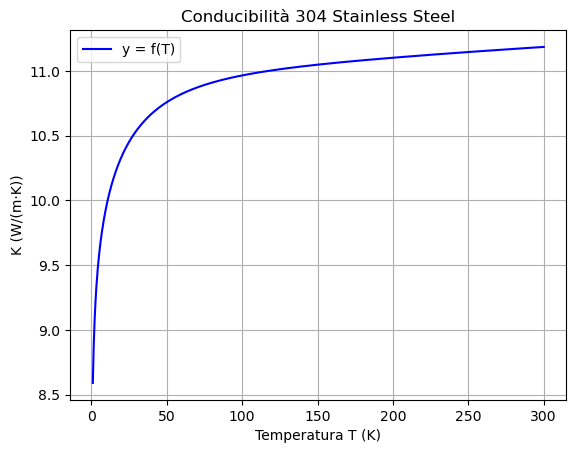

Carico conduzione cilindro alluminio inox 304 :   Q = 5.6214e-02 W


: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definire i coefficienti
a = -1.4087
b = 1.3982
c = 0.2543
d = -0.6260
e = 0.2334
f = 0.4256
g = -0.4658
h = 0.1650
i = -0.0199

# Funzione conducibilità vs Temperatura
def y(T):
    logT = np.log10(T)
    return 10 + a + b*logT + c*logT**2 + d*logT**3 + e*logT**4 + f*logT**5 + g*logT**6 + h*logT**7 + i*logT**8

 # Funzione per l'integrazione
def integrand(T):
    return y(T)
 
    

#--------INTEGRALE DI CONDUCIBILITà----------------
# estremi per l'integrazione
T_min = 1.4
T_max = 4.

# Controllo se gli estremi sono validi
if T_min < 1 or T_max > 300:
    print("Errore: Gli estremi dell'integrazione devono essere compresi tra 4 K e 300 K.")
else:
# Calcolo dell'integrale solo se gli estremi sono validi
    integral_value, error = quad(integrand, T_min, T_max)
    print(f"L'integrale di conduzione tra {T_min} K e {T_max} K è: {integral_value:.4f} W/m")

# Intervallo di temperatura
T_range = np.linspace(1, 300, 1000)

# Valori di y calcolati
y_values = y(T_range)

# Plot della funzione
plt.plot(T_range, y_values, label='y = f(T)', color='blue')
plt.title('Conducibilità 304 Stainless Steel')
plt.xlabel('Temperatura T (K)')
plt.ylabel('K (W/(m·K))')
plt.grid(True)
plt.legend()
plt.show()
#plt.savefig("Carico_conduzione_g10_nist.png")



#--------CARICO CONDUZIONE DA PARAMETRI GEOMETRICI
    # Caratteristiche geometriche cilindretti G10 
diam_int = 1e-2
spessore = 5e-3
l = 10e-2 # lunghezza cilindretti
A = np.pi *( ((diam_int + 2*spessore)/2)**2 - ( diam_int /2)**2)


# Calcolo di Q
Q = A/l * integral_value * 1        

# Output del risultato
print(f"Carico conduzione cilindro alluminio inox 304 :   Q = {Q:.4e} W")

